# Task E

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
# you can write your code here
# Split the data into  𝑋𝑡𝑟𝑎𝑖𝑛 (60),  𝑋𝑐𝑣 (20),  𝑋𝑡𝑒𝑠𝑡 (20)
from sklearn.model_selection import train_test_split

X_tr,X_test,y_tr,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train,X_cv,y_train,y_cv=train_test_split(X_tr,y_tr,random_state=42,test_size=0.25)
print(X_train.shape,X_test.shape,X_cv.shape)

clf=SVC(𝑔𝑎𝑚𝑚𝑎=0.001,𝐶=100)
clf.fit(X_train,y_train)

f_cv=clf.decision_function(X_cv)



intercept=clf.intercept_
dual_coef=clf.dual_coef_

(3000, 5) (1000, 5) (1000, 5)


In [4]:
g=0.001
def custom_de(X_cv,g):
    from tqdm import tqdm
    inter=clf.intercept_
    sup_vecs=clf.support_vectors_
    dual_coef=clf.dual_coef_
    ans=0
    for Xq in tqdm(X_cv):
        for i in range(np.shape(sup_vecs)[0]):
            k=np.linalg.norm(sup_vecs[i,:]-Xq)
            ans =+  dual_coef[0,i]  *  np.exp(-g*(k**2))
        ans =+ inter  
        fcv=np.append(f_cv,ans)
    fcv = np.delete(fcv, -1)
    return fcv
fcv=custom_de(X_cv,g)

head, *tail= fcv
print("Custom decision function output only first value is printed =",head)
head1, *tail1= f_cv                                 
print("Built-in decision function output only first value is printed =",head1)


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 248.26it/s]

Custom decision function output only first value is printed = 0.8772503226216477
Built-in decision function output only first value is printed = 0.8772503226216477


In [5]:
print(f_cv.shape,fcv.shape,X_cv.shape)
print(f_cv[-1],fcv[-1])

(1000,) (1000,) (1000, 5)
1.6044245082713067 1.6044245082713067


# Task F

In [12]:
def convter(data):
    x=[]
    for i in data:
        if i==0:         
            x.append(y_n)
        else:
            x.append(y_p)
    return x    

N_p=list(y_train).count(1)  # N+
N_n=list(y_train).count(0)  # N-

y_n=(1/(N_n+2))
y_p=((N_n+1)/(N_n+2))
    
u_cv=convter(y_cv)


y_p,y_n,N_n,N_p

(0.9995173745173745, 0.00048262548262548264, 2070, 930)

In [13]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    w=np.zeros_like(row_vector)
    b=0
    return w,b

def sigmoid(z):
    s=1/(1+(np.exp(-z)))
    return s\

def logloss(y_true,y_pred):
    sum = 0
    for i in range(len(y_true)):
        sum +=(y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i]))
    loss = -1 * (1 / len(y_true)) * sum
    return np.round(loss,8)

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=(x * (y-sigmoid(np.dot(w.T,x)+b)) )-((alpha/N)* w)
    return np.round(dw,7)

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y-sigmoid(np.dot(w.T,x)+b)
    return np.round(db,6)

def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

from tqdm import tqdm
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0])
    for epoch in tqdm(range(epochs)):
        for i in range(len(X_train)):
            dw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
            db=gradient_db(X_train[i],y_train[i],w,b)
            w= w + (alpha * dw)
            b= b + (alpha * db)
            
        y_pred_train=pred(w,b,X_train)
        y_pred_train=np.clip(y_pred_train, 1e-15, 0.9999999)    
        loss1=logloss(y_train,y_pred_train)
        train_loss.append(loss1)   
    
    return w,b,train_loss

In [14]:
alpha=0.001
eta0=0.001
epochs=20
N=len(u_cv)
w1,b1,train_loss1 = train(f_cv ,u_cv , epochs , alpha , eta0)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 31.57it/s]


In [15]:
print(w1,b1,train_loss1)
f_test  = clf.decision_function( X_test )

1.7331393739000063 -0.12378158099999795 [0.13577686, 0.10633886, 0.09464353, 0.08847181, 0.08471942, 0.08223581, 0.08049632, 0.07922781, 0.07827438, 0.07754074, 0.07696556, 0.07650768, 0.07613852, 0.07583772, 0.07559036, 0.07538535, 0.07521429, 0.0750707, 0.07494953, 0.0748468]


In [16]:
def prob(w1,b1,f_test):
    z=w1*f_test+b1
    s=1/(1+(np.exp(-z)))
    return s
prob(w1,b1,f_test)

array([7.27889081e-02, 8.42206029e-02, 2.23246259e-01, 1.12120231e-02,
       1.75155179e-03, 7.68839529e-01, 9.41481691e-01, 4.76923594e-02,
       1.32014280e-03, 6.01744936e-01, 9.81593602e-01, 3.46576596e-03,
       2.10347539e-01, 2.71116001e-01, 1.57916033e-01, 9.41881446e-01,
       5.06797578e-03, 6.99875195e-03, 7.95188953e-03, 4.75650048e-02,
       2.63505869e-02, 9.84536590e-04, 9.78555760e-01, 9.27031380e-01,
       1.09744936e-02, 5.12453644e-03, 1.15856350e-03, 1.17444016e-01,
       1.41759966e-01, 8.34956747e-01, 1.12216551e-02, 2.22364763e-03,
       9.83803180e-04, 3.98615659e-03, 9.42507675e-01, 4.97666280e-01,
       4.40820904e-01, 2.24759442e-02, 7.24230267e-01, 8.97556366e-01,
       3.21074006e-03, 5.52533746e-01, 5.97380715e-01, 4.97829541e-01,
       4.89579919e-03, 9.53894323e-01, 7.65644890e-03, 2.42360368e-03,
       8.55696674e-01, 9.65179245e-01, 3.79974339e-01, 5.74759132e-02,
       1.29403288e-02, 3.18464834e-03, 8.26265523e-03, 3.60987045e-02,
      

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0.13577686, 0.10633886, 0.09464353, 0.08847181, 0.08471942, 0.08223581, 0.08049632, 0.07922781, 0.07827438, 0.07754074, 0.07696556, 0.07650768, 0.07613852, 0.07583772, 0.07559036, 0.07538535, 0.07521429, 0.0750707, 0.07494953, 0.0748468]


Text(0.5, 1.0, 'epochs vs loss')

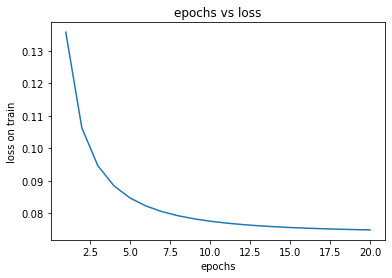

In [29]:
import matplotlib.pyplot as plt
y=train_loss1
x=np.arange(1,epochs+1)
plt.plot(x, y)
plt.xlabel("epochs")
plt.ylabel("loss on train")
plt.title("epochs vs loss")